In [175]:
## 파이썬 글씨체 설정
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
from matplotlib import font_manager

font_name = font_manager.FontProperties(fname="/Library/Fonts/AppleGothic.ttf").get_name()

plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False


## 원본에 딕셔너리붙인것 클래스 컬럼 생성

In [96]:
df = pd.read_csv('./data2/dict_anal_rmnan_2402.csv')

In [97]:
col_name = df.columns[-13:].tolist()

In [98]:
col_name.append('nan')

In [99]:
col_name[-1]

'nan'

In [100]:
classes = []
for row in range(len(df)):
    
    m = df.iloc[row,-13:].max()
    
    if m == 0:
        max_index = col_name[-1]
    else:
        for i,j in enumerate(df.iloc[row,-13:]):
            if j == m:
                max_index = col_name[i]
        
    classes.append(max_index)

In [101]:
len(classes)

38892

In [102]:
test = df

test['classes'] = classes

In [103]:
test['classes'].value_counts()

votes_before    11511
votes_sat       10881
nan              7108
votes_delay      4506
votes_part       1329
votes_ret         873
votes_qual        640
votes_od          504
votes_etc         494
votes_bro         316
votes_wrong       303
votes_ss          282
votes_naa          96
votes_pack         49
Name: classes, dtype: int64

In [104]:
test.to_csv('./data2/dict_anal_class_2402.csv')

In [ ]:
'del_period_deadline_yn'
'del_period'
'del_period_psy'
'distance'
'order_product_value'
'freight_value_proportion'
'order_day'
'installments_yn'

In [55]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import random

ModuleNotFoundError: No module named 'keras'

In [60]:
test['classes'][0]

'votes_sat'

In [90]:
test['classes'].value_counts()

votes_before    11511
votes_sat       10881
nan              7108
votes_delay      4506
votes_part       1329
votes_ret         873
votes_qual        640
votes_od          504
votes_etc         494
votes_bro         316
votes_wrong       303
votes_ss          282
votes_naa          96
votes_pack         49
Name: classes, dtype: int64

In [91]:
tot_class = []
for i in test['classes']:
    if i =='votes_ss':
        tot_class.append('nan')
    elif i =='votes_etc':
        tot_class.append('nan')
    elif i == 'votes_naa':
        tot_class.append('nan')
    elif i == 'votes_pack':
        tot_class.append('votes_bro')
        
    else:
        tot_class.append(i)
        

In [77]:
test2 = test

In [92]:
test['classes'] = tot_class

In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38892 entries, 0 to 38891
Data columns (total 78 columns):
order_id                          38892 non-null object
order_status                      38892 non-null object
order_products_value              38892 non-null float64
order_freight_value               38892 non-null float64
order_items_qty                   38892 non-null int64
order_sellers_qty                 38892 non-null int64
order_purchase_timestamp          38892 non-null object
order_aproved_at                  38883 non-null object
order_estimated_delivery_date     38892 non-null object
order_delivered_customer_date     37366 non-null object
product_id                        38892 non-null object
product_category_name_english     38892 non-null object
product_name_length               38892 non-null int64
product_description_length        38892 non-null int64
product_photos_qty                38892 non-null int64
product_weight_g                  38882 non-null float

In [94]:

test['classes'].value_counts()

votes_before    11511
votes_sat       10881
nan              7980
votes_delay      4506
votes_part       1329
votes_ret         873
votes_qual        640
votes_od          504
votes_bro         365
votes_wrong       303
Name: classes, dtype: int64

In [105]:
### 테스트 결과 불러오기 
results = pd.read_csv('test_df.csv')

In [106]:
results.head()

,Unnamed: 0,pn_review_score,del_period_deadline_yn,del_period,del_period_psy,distance,order_product_value_range,freight_value_proportion,order_day,installments_yn,...,votes_delay,votes_part,votes_wrong,votes_ret,votes_naa,votes_ss,votes_od,votes_etc,classes,pred
0,3,Positive,True,11.067474,5.278568,1067.626050,v5,0.033490,Saturday,True,...,0,0,0,0,0,0,0,0,votes_before,votes_before
1,4,Positive,True,4.976355,10.172140,15.062947,v1,0.324302,Wednesday,True,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6,Positive,True,12.073198,19.361432,1208.527186,v2,0.491643,Friday,True,...,0,0,0,0,0,0,0,0,votes_sat,votes_sat
3,8,Negative,True,7.968119,15.499994,915.431181,v2,0.235000,Monday,True,...,0,0,0,0,0,0,0,0,votes_sat,votes_sat
4,11,Positive,True,7.608074,15.461660,872.362415,v4,0.088677,Tuesday,False,...,0,0,0,0,0,0,0,0,votes_before,votes_before


In [107]:
results[['pn_review_score','pred']].head()

,pn_review_score,pred
0,Positive,votes_before
1,Positive,NaN
2,Positive,votes_sat
3,Negative,votes_sat
4,Positive,votes_before


In [108]:
results[results['pn_review_score']=='Positive']['pred'].value_counts()

votes_sat       3017
votes_before    3010
votes_delay      145
votes_od          51
votes_part        47
votes_ret         28
votes_qual        23
votes_bro         20
votes_etc         15
votes_wrong        8
votes_ss           5
votes_naa          5
votes_pack         1
Name: pred, dtype: int64

In [109]:
results[results['pn_review_score']=='Negative']['pred'].value_counts()

votes_delay     1213
votes_before     449
votes_part       353
votes_sat        252
votes_ret        233
votes_qual       165
votes_etc        131
votes_od         101
votes_wrong       83
votes_bro         76
votes_ss          72
votes_naa         18
votes_pack         6
Name: pred, dtype: int64

In [118]:
pd.DataFrame(results.groupby('pn_review_score')['pred'].value_counts()).to_csv('결과빈도표.csv')
pd.DataFrame(results.groupby('classes')['pred'].value_counts()).to_csv('결과빈도표2.csv')

In [117]:
pd.DataFrame(results.groupby('pn_review_score')['pred'].value_counts()).to_csv('결과빈도표.csv')

In [168]:
res1= pd.DataFrame(results.groupby('pn_review_score')['pred'].value_counts())

In [159]:
res1.head()

,pn_review_score,pred
pred,,
votes_delay,Negative,1213
votes_before,Negative,449
votes_part,Negative,353
votes_sat,Negative,252
votes_ret,Negative,233


In [169]:
res1.reset_index(['pn_review_score'],inplace = True)

In [136]:
ko_col = {'votes_delay':'배송지연', 'votes_before':'빨리도착','votes_part':'누락/부분배송','votes_sat':'만족'
          ,'votes_ret':'리턴','votes_qual':'제품불량','votes_etc':'기타','votes_od':'기타배송',
          'votes_wrong':'잘못된배송','votes_bro':'제품훼손','votes_ss':'서비스','votes_naa':'과대광고','votes_pack':'포장문제'}

In [171]:
new_index = [ko_col[i] for i in res1.index.tolist()]
res1['label'] = new_index
res1.set_index('label', inplace=True)

In [217]:
countsum = res1.groupby(res1.index).sum()
indexlist = res1.index.tolist()

In [279]:
#palette = dict(zip(list(set(indexlist)), sns.color_palette()))

In [243]:
prop = []
for ind,i in enumerate(res1['pred']):
    a = i/countsum.loc[indexlist[ind]]
    prop.append(100*float(a))
    

In [259]:
negative

,pn_review_score,pred,prop
label,,,
배송지연,Negative,1213,89.322533
빨리도착,Negative,449,12.980630
누락/부분배송,Negative,353,88.250000
만족,Negative,252,7.708779
리턴,Negative,233,89.272031
제품불량,Negative,165,87.765957
기타,Negative,131,89.726027
기타배송,Negative,101,66.447368
잘못된배송,Negative,83,91.208791


In [244]:
res1['prop']= prop

In [283]:
palette = dict(zip(list(set(indexlist)), sns.color_palette()))

{'제품불량': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 '제품훼손': (1.0, 0.4980392156862745, 0.054901960784313725),
 '만족': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 '기타배송': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 '누락/부분배송': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 '기타': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 '잘못된배송': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 '포장문제': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 '과대광고': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 '빨리도착': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)}

In [291]:
cat_order = {'만족':0, '빨리도착':1,
          '제품불량':2 ,'제품훼손':3,'포장문제':4,'과대광고':5,
          '잘못된배송':6 ,'서비스':7,
          '배송지연':8,'누락/부분배송':9,'기타배송':10,'리턴':11
          ,'기타':12}

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


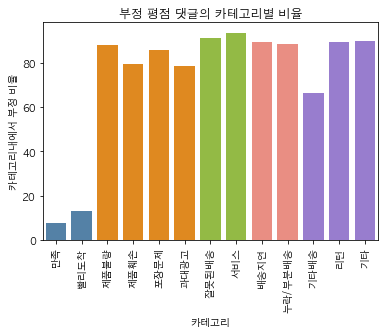

In [390]:
negative = res1[res1['pn_review_score']=='Negative']

order = []
for i in negative.index.tolist():
    order.append(cat_order[i])
negative['order'] = order
negative = negative.sort_values('order')


pal = ['steelblue','steelblue','darkorange','darkorange','darkorange','darkorange',
      'yellowgreen','yellowgreen','salmon','salmon','mediumpurple','mediumpurple','mediumpurple','darkred']


#pal = sns.color_palette("Paired", len(negative['prop']))
#rank = negative['order'].argsort().argsort()  
#pal = ['steelblue','skyblue','darkorange','navajowhite','orange','darkgolenrod',
#      'olivedrab','yellowgreen','salmon','darkred','plum','mediumpurple','darkorchid']
#palette=dict(zip(list(set(indexlist)), np.array(pal[::-1])[rank]))
#palette=np.array(pal)[rank]
#palette=dict(zip(list(set(indexlist)), pal))
sns.barplot(x= negative.index, y = 'prop',data = negative, palette=pal)
plt.xticks(rotation = 90)

plt.title('부정 평점 댓글의 카테고리별 비율')
plt.ylabel('카테고리내에서 부정 비율')
plt.xlabel('카테고리')
plt.savefig('모델사용)부정 평점 댓글의 카테고리별 비율.png',bbox_inches='tight' )

In [319]:
pal = pal[2],pal[3],pal[0],pal[1],pal[4],pal[5],pal[6],pal[7],pal[8],pal[9],pal[10],pal[11],pal[12]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


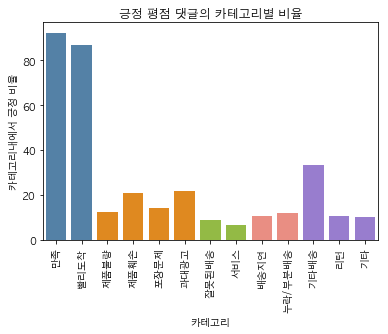

In [391]:
positive = res1[res1['pn_review_score']=='Positive']

order = []
for i in positive.index.tolist():
    order.append(cat_order[i])
positive['order'] = order
positive = positive.sort_values('order')

#pal = sns.color_palette("Paired", len(positive['prop']))
#rank = positive['order'].argsort().argsort()  

pal = ['steelblue','steelblue','darkorange','darkorange','darkorange','darkorange',
      'yellowgreen','yellowgreen','salmon','salmon','mediumpurple','mediumpurple','mediumpurple','darkred']

#palette=dict(zip(list(set(indexlist)), pal))

#, palette=np.array(pal[::-1])[rank]
sns.barplot(x= positive.index, y = 'prop',data = positive, palette=pal)

plt.xticks(rotation = 90)


plt.title('긍정 평점 댓글의 카테고리별 비율')
plt.ylabel('카테고리내에서 긍정 비율')
plt.xlabel('카테고리')
plt.savefig('모델사용)긍정 평점 댓글의 카테고리별 비율.png',bbox_inches='tight' )

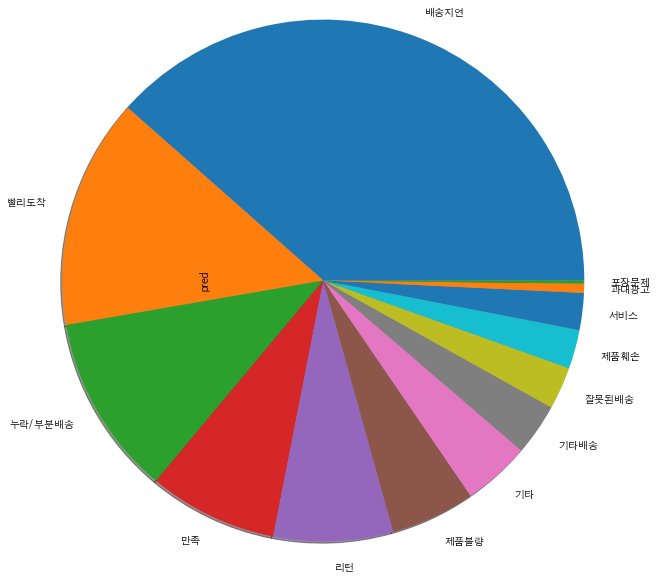

In [186]:

pal = sns.color_palette("Greens_d", len(res1['pred']))
rank = res1['pred'].argsort().argsort()   


#np.array(pal[::-1])[rank]
a =res1[res1['pn_review_score']=='Negative']['pred'].plot.pie(radius=3, shadow=True)


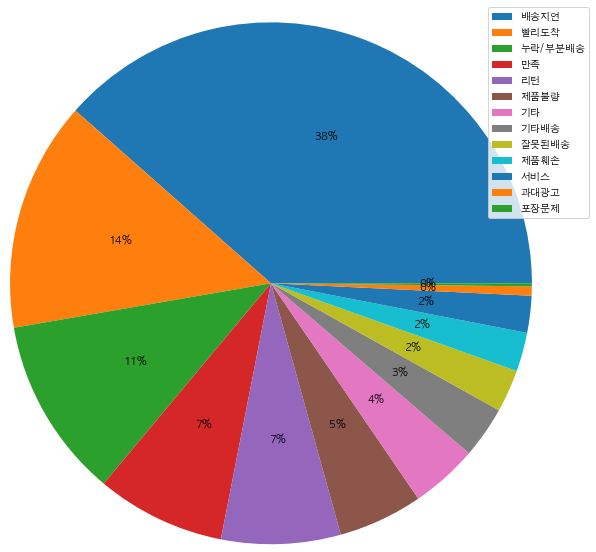

## 모델없이 성능평가

In [347]:
df2 = pd.DataFrame(df.groupby('pn_review_score')['classes'].value_counts())

In [400]:
pdf= pd.DataFrame(df.groupby('pn_review_score')['classes'].value_counts())
cdf= pd.DataFrame(df.groupby('classes')['pn_review_score'].value_counts())

In [401]:
cdf

pn_review_score
classes      pn_review_score                 
nan          Positive                    4001
             Negative                    3107
votes_before Positive                   10037
             Negative                    1474
votes_bro    Negative                     257
             Positive                      59
votes_delay  Negative                    3914
             Positive                     592
votes_etc    Negative                     441
             Positive                      53
votes_naa    Negative                      79
             Positive                      17
votes_od     Negative                     342
             Positive                     162
votes_pack   Negative                      38
             Positive                      11
votes_part   Negative                    1173
             Positive                     156
votes_qual   Negative                     556
             Positive                      84
votes_ret    Negative                     782
             Positive                      91
votes_sat    Positive                   10057
             Negative                     824
votes_ss     Negative                     264
             Positive                      18
votes_wrong  Negative                     267
             Positive                      36

In [411]:
npie=pd.DataFrame(df2[df2['pn_review_score']=='Negative']['classes']/135.18)

In [412]:
sns.plot.pie(data = npie['classes'])

AttributeError: module 'seaborn' has no attribute 'plot'

In [409]:
df2[df2['pn_review_score']=='Positive']['classes']/253.74

label
만족         39.635060
빨리도착       39.556239
분류없음       15.768109
배송지연        2.333097
기타배송        0.638449
누락/부분배송     0.614803
리턴          0.358635
제품불량        0.331048
제품훼손        0.232521
기타          0.208875
잘못된배송       0.141878
서비스         0.070939
과대광고        0.066998
포장문제        0.043351
Name: classes, dtype: float64

In [348]:
df2.reset_index(['pn_review_score'],inplace = True)

In [350]:
ko_col = {'votes_delay':'배송지연', 'votes_before':'빨리도착','votes_part':'누락/부분배송','votes_sat':'만족'
          ,'votes_ret':'리턴','votes_qual':'제품불량','votes_etc':'기타','votes_od':'기타배송',
          'votes_wrong':'잘못된배송','votes_bro':'제품훼손','votes_ss':'서비스','votes_naa':'과대광고','votes_pack':'포장문제',
         'nan':'분류없음'}

In [351]:
cat_order = {'만족':0, '빨리도착':1,
          '제품불량':2 ,'제품훼손':3,'포장문제':4,'과대광고':5,
          '잘못된배송':6 ,'서비스':7,
          '배송지연':8,'누락/부분배송':9,'기타배송':10,'리턴':11
          ,'기타':12,'분류없음':13}

In [352]:
new_index = [ko_col[i] for i in df2.index.tolist()]

In [356]:
df2['label'] = new_index
df2.set_index('label', inplace=True)

In [357]:

countsum = df2.groupby(df2.index).sum()
indexlist = df2.index.tolist()

In [360]:
df2.head()

,pn_review_score,classes
label,,
배송지연,Negative,3914
분류없음,Negative,3107
빨리도착,Negative,1474
누락/부분배송,Negative,1173
만족,Negative,824


In [362]:
prop = []
for ind,i in enumerate(df2['classes']):
    a = i/countsum.loc[indexlist[ind]]
    prop.append(100*float(a))
    
df2['prop']= prop

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


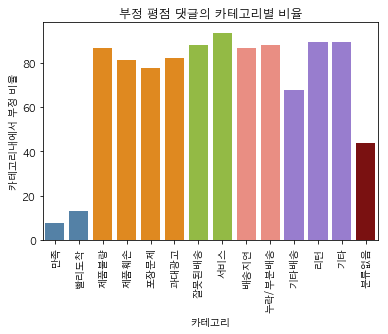

In [388]:
negative = df2[df2['pn_review_score']=='Negative']

order = []
for i in negative.index.tolist():
    order.append(cat_order[i])
negative['order'] = order
negative = negative.sort_values('order')

#pal = sns.color_palette("Blues_d", len(negative['prop']))
#rank = negative['order'].argsort().argsort()  


pal = ['steelblue','steelblue','darkorange','darkorange','darkorange','darkorange',
      'yellowgreen','yellowgreen','salmon','salmon','mediumpurple','mediumpurple','mediumpurple','darkred']
#, palette=np.array(pal)[rank]
sns.barplot(x= negative.index, y = 'prop',data = negative, palette=pal)
plt.xticks(rotation = 90)

plt.title('부정 평점 댓글의 카테고리별 비율')
plt.ylabel('카테고리내에서 부정 비율')
plt.xlabel('카테고리')
plt.savefig('1.부정 평점 댓글의 카테고리별 비율.png',bbox_inches='tight' )

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


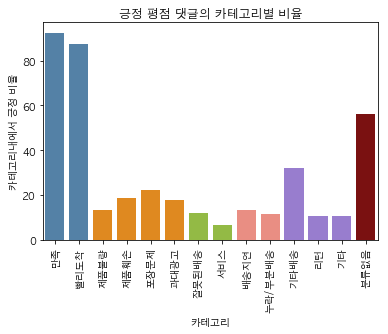

In [387]:
positive = df2[df2['pn_review_score']=='Positive']
positive['label_rank'] = [0,0,1,1,1,1,2,2,3,3,4,4,4,5]

order = []
for i in positive.index.tolist():
    order.append(cat_order[i])
positive['order'] = order
positive = positive.sort_values('order')

#pal = sns.color_palette("Paired", len(positive['prop']))
#rank = positive['order'].argsort().argsort() 

pal = ['steelblue','steelblue','darkorange','darkorange','darkorange','darkorange',
      'yellowgreen','yellowgreen','salmon','salmon','mediumpurple','mediumpurple','mediumpurple','darkred']
#np.array(pal)[rank]

sns.barplot(x= positive.index, y = 'prop',data = positive, palette=pal)
plt.xticks(rotation = 90)


plt.title('긍정 평점 댓글의 카테고리별 비율')
plt.ylabel('카테고리내에서 긍정 비율')
plt.xlabel('카테고리')
plt.savefig('1.긍정 평점 댓글의 카테고리별 비율.png',bbox_inches='tight' )